In [1]:
import numpy as np
import scipy.stats as stats
import math
import matplotlib.pyplot as plt
import pandas as pd

## Question 2.1

In [4]:
stats.geom.ppf(0.95,0.5)

5.0

In [22]:
alpha = np.arange(0.9,1,0.01)
alpha1 = alpha + 0.0099
alpha2 = alpha1 + 0.00001
alpha = np.append(alpha,alpha1)
alpha = np.append(alpha,alpha2)
alpha = np.sort(alpha)

array([0.9    , 0.9099 , 0.90991, 0.91   , 0.9199 , 0.91991, 0.92   ,
       0.9299 , 0.92991, 0.93   , 0.9399 , 0.93991, 0.94   , 0.9499 ,
       0.94991, 0.95   , 0.9599 , 0.95991, 0.96   , 0.9699 , 0.96991,
       0.97   , 0.9799 , 0.97991, 0.98   , 0.9899 , 0.98991, 0.99   ,
       0.9999 , 0.99991])

In [31]:
df = pd.DataFrame(index = alpha , columns = ['VaR'])
for i in range(len(alpha)):
    if (i+1) % 3 != 0: 
        df.VaR[i] = stats.geom.ppf(np.trunc(alpha[i]*100)/100,0.5)

Text(0, 0.5, 'VaR')

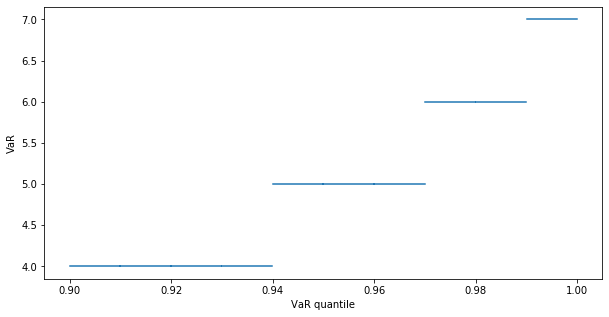

In [35]:
plt.figure(figsize = (10,5))
plt.plot(df)
plt.xlabel('VaR quantile')
plt.ylabel('VaR')

## Question 2.2

In [60]:
def Poisson(mu,k):
    return np.exp(-mu)*np.power(mu, k)/ math.factorial(k)

In [61]:
df2 = pd.DataFrame(index = alpha,columns = ['X' , 'Y' , 'L'])
for i in range(len(alpha)):
    if (i+1) % 3 != 0: 
        df2.at[alpha[i],'X'] = stats.poisson.ppf(np.trunc(alpha[i]*100)/100,1)
        df2.at[alpha[i],'Y'] = stats.poisson.ppf(np.trunc(alpha[i]*100)/100,2)


In [62]:
n = 10**5
X = np.random.poisson(1,n)
Y = np.random.poisson(2,n)
L = X + Y
L = np.sort(L)
for i in range(len(alpha)):
    if (i+1) % 3 != 0: 
        df2.at[alpha[i],'L'] = L[int(n * np.trunc(alpha[i]*100)/100)]

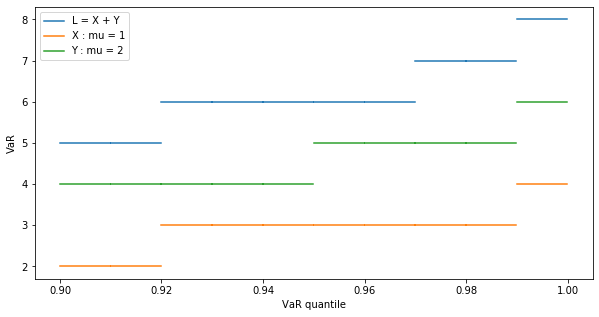

In [63]:
plt.figure(figsize = (10,5))
plt.plot(alpha,df2.L,label = 'L = X + Y')
plt.plot(df2.X,label = 'X : mu = 1')
plt.plot(df2.Y , label = 'Y : mu = 2')
plt.xlabel('VaR quantile')
plt.ylabel('VaR')
plt.legend()